# Classification model based on spectral properties

Developing a PLS-DA model based on the combined datasets acquired of spectra and assigned physical properties. 

In [66]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hoggorm as ho
import hoggormplot as hopl
np.bool = np.bool_
from scipy import stats
from sklearn.preprocessing import StandardScaler
from matplotlib.axes import Axes
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import confusion_matrix

In [67]:
# spectral data from dried brick after SNV
#spectral = pd.read_excel(r"C:\Users\marth\OneDrive\Skole\Master\Kode\murstein-master-2024\Streamline v2\Resultater 2\dried spectra\dried mean snv spectra\excel\All Dried Bricks Mean Spectra after SNV.xlsx")

# from untreated brick without mortar removal
#df = pd.read_excel('ABCD normally distributed dataset from untreated brick with mortar SNV spectra.xlsx')
# from untreated brick with mortar removal
#spectral = pd.read_excel(r"C:\Users\marth\OneDrive\Skole\Master\Kode\murstein-master-2024\Streamline v3 edge and mortar removal\spectra after mortar removal\snv spectra\excel\All bricks no mortar SNV ABCD.xlsx")

#spectral = spectral.iloc[:,1:]
#spectral

# Load the untreated, mortar removed data
# obs split ABCD eller ikke
#df = pd.read_excel('normally distributed dataset from untreated no mortar SNV spectra.xlsx')
#df = pd.read_excel('ABCD normally distributed dataset from untreated no mortar SNV spectra.xlsx')

# Load dried spectra, with mortar removal, split ABCD
df = pd.read_excel('ABCD normally distributed dataset from dried no mortar SNV spectra.xlsx')
df = df.iloc[:, 1:]
df

,953,959,964,970,975,981,986,991,997,1002,...,group,brick_id,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated
0,4.564952,4.425837,4.288240,4.148088,4.004263,3.854006,3.702563,3.548011,3.394499,3.239871,...,1,A9_B,1941.658716,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439
1,4.166178,4.042790,3.920336,3.794294,3.662620,3.523419,3.380742,3.235313,3.089030,2.941246,...,1,A9_B,1945.953933,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790
2,4.365933,4.235829,4.106800,3.974876,3.837642,3.694337,3.547977,3.399301,3.250602,3.100934,...,1,A9_B,1941.999514,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271
3,4.475484,4.347092,4.219944,4.089712,3.955436,3.814415,3.671810,3.525949,3.380619,3.233716,...,1,A9_B,1949.637277,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598
4,4.167475,4.054071,3.941422,3.824565,3.701470,3.570901,3.436358,3.298501,3.159665,3.018803,...,1,A9_B,1938.356678,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.925933,0.812140,0.698517,0.582075,0.465935,0.350932,0.245844,0.142975,0.050000,-0.034089,...,9,FV6_A,2112.020016,7.979467,0.761022,0.716667,1508.447192,56.044713,0.313599,0.305041
1460,3.605123,3.481163,3.357489,3.231244,3.094204,2.946122,2.796618,2.651848,2.509309,2.368961,...,9,FV6_A,2130.772255,7.582548,0.795226,0.538106,1520.919744,63.770995,0.330191,0.273771
1461,1.040879,0.971682,0.902594,0.830338,0.767414,0.704992,0.646425,0.587726,0.537312,0.491268,...,9,FV6_A,2106.479201,6.947556,0.793975,0.290903,1505.203954,56.008320,0.299685,0.203294
1462,1.085196,1.012857,0.940619,0.867648,0.794280,0.720073,0.652334,0.587969,0.528217,0.476769,...,9,FV6_A,2104.541695,7.077607,0.805634,0.694875,1354.935202,58.597718,0.329550,0.319105


## Classifying the normally distributed data based on the assigned properties per spectra

In [68]:

def CheckOther(row):
    check = False
    if row['Dry density']< 1400:
        check = True
    elif row ['Water absorption']>20:
        check = True
    elif row['PN']>0.90:
        check = True
    elif row['FR calculated']>0.70:
        check = True
    elif row['Compressive strength MPa'] < 10:
        check = True
    return check

def CheckPavedBrick(row):
    check = False
    if CheckOther(row):
        check = False
    elif (row['FR calculated']<0.30) & (row['Compressive strength MPa'] > 50) & (row['PN']<0.90):
        check = True
    return check

def CheckFacade(row):
    check = False
    if CheckOther(row):
        check = False
    elif CheckPavedBrick(row):
        check = False
    elif row['Compressive strength MPa'] < 10:
        check = False
    elif row['PN']>0.90:
        check = False
    elif row['FR calculated']>0.70:
        check = False
    else:
        check = True
        
    return check

def ClassifyBricks(df):
    paved = []
    facade = []
    other = []
    for row in range(df.shape[0]):
        if CheckOther(df.iloc[row, :]):
            paved.append(0)
            facade.append(0)
            other.append(1) 
        elif CheckPavedBrick(df.iloc[row, :]):
            paved.append(1)
            facade.append(0)
            other.append(0)
        elif CheckFacade == False:
            paved.append(0)
            facade.append(0)
            other.append(1)
        else:
            paved.append(0)
            facade.append(1)
            other.append(0)  
    
    classified_df = df
    classified_df['paved_brick'] = paved
    classified_df['facade'] = facade
    classified_df['other'] = other
    
    return classified_df
        

classified = ClassifyBricks(df)
classified
    

,953,959,964,970,975,981,986,991,997,1002,...,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated,paved_brick,facade,other
0,4.564952,4.425837,4.288240,4.148088,4.004263,3.854006,3.702563,3.548011,3.394499,3.239871,...,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439,0,1,0
1,4.166178,4.042790,3.920336,3.794294,3.662620,3.523419,3.380742,3.235313,3.089030,2.941246,...,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790,0,1,0
2,4.365933,4.235829,4.106800,3.974876,3.837642,3.694337,3.547977,3.399301,3.250602,3.100934,...,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271,0,1,0
3,4.475484,4.347092,4.219944,4.089712,3.955436,3.814415,3.671810,3.525949,3.380619,3.233716,...,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598,0,1,0
4,4.167475,4.054071,3.941422,3.824565,3.701470,3.570901,3.436358,3.298501,3.159665,3.018803,...,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.925933,0.812140,0.698517,0.582075,0.465935,0.350932,0.245844,0.142975,0.050000,-0.034089,...,7.979467,0.761022,0.716667,1508.447192,56.044713,0.313599,0.305041,0,1,0
1460,3.605123,3.481163,3.357489,3.231244,3.094204,2.946122,2.796618,2.651848,2.509309,2.368961,...,7.582548,0.795226,0.538106,1520.919744,63.770995,0.330191,0.273771,1,0,0
1461,1.040879,0.971682,0.902594,0.830338,0.767414,0.704992,0.646425,0.587726,0.537312,0.491268,...,6.947556,0.793975,0.290903,1505.203954,56.008320,0.299685,0.203294,1,0,0
1462,1.085196,1.012857,0.940619,0.867648,0.794280,0.720073,0.652334,0.587969,0.528217,0.476769,...,7.077607,0.805634,0.694875,1354.935202,58.597718,0.329550,0.319105,0,1,0


In [19]:
# Assigning the means to each mean spectrum
#full_data = spectral.join(grouped_data, on="group")
#full_data = full_data.iloc[:, 1:]
#full_data

#full_data = spectral.join(classified, on="group")
#full_data = full_data.iloc[:, 1:]
#full_data

In [69]:
# obs de mursteinene var allerede fjerna?
remove = classified[(classified.brick_id == 'BB20_A') | (classified.brick_id == 'SVB5_B')].index
classified = classified.drop(remove)
classified = classified.reset_index(drop=True)
classified

,953,959,964,970,975,981,986,991,997,1002,...,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated,paved_brick,facade,other
0,4.564952,4.425837,4.288240,4.148088,4.004263,3.854006,3.702563,3.548011,3.394499,3.239871,...,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439,0,1,0
1,4.166178,4.042790,3.920336,3.794294,3.662620,3.523419,3.380742,3.235313,3.089030,2.941246,...,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790,0,1,0
2,4.365933,4.235829,4.106800,3.974876,3.837642,3.694337,3.547977,3.399301,3.250602,3.100934,...,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271,0,1,0
3,4.475484,4.347092,4.219944,4.089712,3.955436,3.814415,3.671810,3.525949,3.380619,3.233716,...,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598,0,1,0
4,4.167475,4.054071,3.941422,3.824565,3.701470,3.570901,3.436358,3.298501,3.159665,3.018803,...,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.925933,0.812140,0.698517,0.582075,0.465935,0.350932,0.245844,0.142975,0.050000,-0.034089,...,7.979467,0.761022,0.716667,1508.447192,56.044713,0.313599,0.305041,0,1,0
1436,3.605123,3.481163,3.357489,3.231244,3.094204,2.946122,2.796618,2.651848,2.509309,2.368961,...,7.582548,0.795226,0.538106,1520.919744,63.770995,0.330191,0.273771,1,0,0
1437,1.040879,0.971682,0.902594,0.830338,0.767414,0.704992,0.646425,0.587726,0.537312,0.491268,...,6.947556,0.793975,0.290903,1505.203954,56.008320,0.299685,0.203294,1,0,0
1438,1.085196,1.012857,0.940619,0.867648,0.794280,0.720073,0.652334,0.587969,0.528217,0.476769,...,7.077607,0.805634,0.694875,1354.935202,58.597718,0.329550,0.319105,0,1,0


In [70]:
# get data with applied z-score technique
zdata = classified[(np.abs(stats.zscore(classified.iloc[:, :288])) < 3).all(axis=1)]  # eller bruk any
zdata = zdata.reset_index(drop=True)
zdata

,953,959,964,970,975,981,986,991,997,1002,...,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated,paved_brick,facade,other
0,4.564952,4.425837,4.288240,4.148088,4.004263,3.854006,3.702563,3.548011,3.394499,3.239871,...,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439,0,1,0
1,4.166178,4.042790,3.920336,3.794294,3.662620,3.523419,3.380742,3.235313,3.089030,2.941246,...,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790,0,1,0
2,4.365933,4.235829,4.106800,3.974876,3.837642,3.694337,3.547977,3.399301,3.250602,3.100934,...,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271,0,1,0
3,4.475484,4.347092,4.219944,4.089712,3.955436,3.814415,3.671810,3.525949,3.380619,3.233716,...,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598,0,1,0
4,4.167475,4.054071,3.941422,3.824565,3.701470,3.570901,3.436358,3.298501,3.159665,3.018803,...,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2.972951,2.822645,2.672653,2.517546,2.377335,2.234834,2.097749,1.959231,1.836608,1.715834,...,7.502421,0.803206,0.562216,1260.298406,51.732340,0.266031,0.282244,1,0,0
1256,2.244685,2.169124,2.093671,2.014500,1.931223,1.838776,1.750323,1.663413,1.583279,1.508199,...,7.497999,0.742626,0.966887,1575.366673,72.880811,0.307425,0.345340,0,1,0
1257,1.187327,1.119849,1.052435,0.982029,0.899601,0.807200,0.714498,0.627772,0.545447,0.469897,...,7.119586,0.776193,0.559087,1475.521447,56.090208,0.259303,0.276013,1,0,0
1258,3.605123,3.481163,3.357489,3.231244,3.094204,2.946122,2.796618,2.651848,2.509309,2.368961,...,7.582548,0.795226,0.538106,1520.919744,63.770995,0.330191,0.273771,1,0,0


In [71]:
data = zdata.drop(labels=["group", "brick_id"], axis=1)
data

,953,959,964,970,975,981,986,991,997,1002,...,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated,paved_brick,facade,other
0,4.564952,4.425837,4.288240,4.148088,4.004263,3.854006,3.702563,3.548011,3.394499,3.239871,...,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439,0,1,0
1,4.166178,4.042790,3.920336,3.794294,3.662620,3.523419,3.380742,3.235313,3.089030,2.941246,...,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790,0,1,0
2,4.365933,4.235829,4.106800,3.974876,3.837642,3.694337,3.547977,3.399301,3.250602,3.100934,...,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271,0,1,0
3,4.475484,4.347092,4.219944,4.089712,3.955436,3.814415,3.671810,3.525949,3.380619,3.233716,...,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598,0,1,0
4,4.167475,4.054071,3.941422,3.824565,3.701470,3.570901,3.436358,3.298501,3.159665,3.018803,...,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2.972951,2.822645,2.672653,2.517546,2.377335,2.234834,2.097749,1.959231,1.836608,1.715834,...,7.502421,0.803206,0.562216,1260.298406,51.732340,0.266031,0.282244,1,0,0
1256,2.244685,2.169124,2.093671,2.014500,1.931223,1.838776,1.750323,1.663413,1.583279,1.508199,...,7.497999,0.742626,0.966887,1575.366673,72.880811,0.307425,0.345340,0,1,0
1257,1.187327,1.119849,1.052435,0.982029,0.899601,0.807200,0.714498,0.627772,0.545447,0.469897,...,7.119586,0.776193,0.559087,1475.521447,56.090208,0.259303,0.276013,1,0,0
1258,3.605123,3.481163,3.357489,3.231244,3.094204,2.946122,2.796618,2.651848,2.509309,2.368961,...,7.582548,0.795226,0.538106,1520.919744,63.770995,0.330191,0.273771,1,0,0


In [72]:
group_ids = list(zdata["group"])
brick_ids = list(zdata["brick_id"])

#len(brick_ids)

1260

In [73]:
data_cut_20_first = data.iloc[:,20:]
first_column_index = max(0, data_cut_20_first.shape[1] - 11 - 20)
columns_to_keep = list(range(first_column_index)) + list(range(data_cut_20_first.shape[1] - 11, data_cut_20_first.shape[1]))
data_cut_20_last = data_cut_20_first.iloc[:, columns_to_keep]
data_cut_20_last.iloc[:, 245:]

,2396,2401,2407,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated,paved_brick,facade,other
0,-0.119331,-0.082081,-0.040808,1941.658716,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439,0,1,0
1,0.338168,0.393329,0.453060,1945.953933,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790,0,1,0
2,0.120262,0.168128,0.220863,1941.999514,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271,0,1,0
3,-0.123401,-0.086854,-0.046349,1949.637277,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598,0,1,0
4,0.254252,0.305939,0.362449,1938.356678,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,-1.421896,-1.312720,-1.187152,2133.801889,7.502421,0.803206,0.562216,1260.298406,51.732340,0.266031,0.282244,1,0,0
1256,-1.640124,-1.563946,-1.474503,2114.513910,7.497999,0.742626,0.966887,1575.366673,72.880811,0.307425,0.345340,0,1,0
1257,-2.029563,-1.952675,-1.862464,2102.711585,7.119586,0.776193,0.559087,1475.521447,56.090208,0.259303,0.276013,1,0,0
1258,-1.475106,-1.397284,-1.304893,2130.772255,7.582548,0.795226,0.538106,1520.919744,63.770995,0.330191,0.273771,1,0,0


In [89]:
data_cut_20_last.query('facade==1')

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated,paved_brick,facade,other
0,1.744566,1.631853,1.524010,1.417335,1.314425,1.214227,1.118951,1.027436,0.941526,0.858801,...,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439,0,1,0
1,1.463717,1.350071,1.240531,1.132891,1.028580,0.926922,0.829383,0.735591,0.646862,0.561571,...,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790,0,1,0
2,1.629454,1.517245,1.408810,1.302585,1.200637,1.101526,1.006765,0.915175,0.828452,0.744324,...,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271,0,1,0
3,1.785482,1.674163,1.567261,1.461352,1.359154,1.259299,1.164010,1.072343,0.986224,0.903004,...,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598,0,1,0
4,1.576216,1.462705,1.352908,1.244983,1.140070,1.037931,0.939626,0.844842,0.754418,0.667345,...,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.556396,1.480783,1.408775,1.338483,1.269550,1.203979,1.141506,1.083139,1.029929,0.980138,...,6.825367,0.809387,0.768399,1714.040088,61.932977,0.366749,0.337547,0,1,0
1251,1.597218,1.520619,1.447454,1.376833,1.308694,1.244212,1.182315,1.124559,1.072210,1.022786,...,7.370205,0.754002,0.796199,1391.864412,68.054601,0.325363,0.314910,0,1,0
1253,1.088991,1.060277,1.034185,1.009606,0.984317,0.961576,0.939280,0.921369,0.906171,0.894567,...,7.643434,0.774156,0.777406,1529.024578,56.995424,0.298564,0.321329,0,1,0
1254,1.011812,0.973437,0.937538,0.901739,0.866943,0.835354,0.806834,0.782287,0.763299,0.745252,...,7.629409,0.803346,1.031018,1613.767947,61.485687,0.386066,0.390701,0,1,0


C:\Users\marth\AppData\Local\Temp/ipykernel_1224/2744672471.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=data_cut_20_last.iloc[:,254], scale="count", label = "FR norm", color="orange")


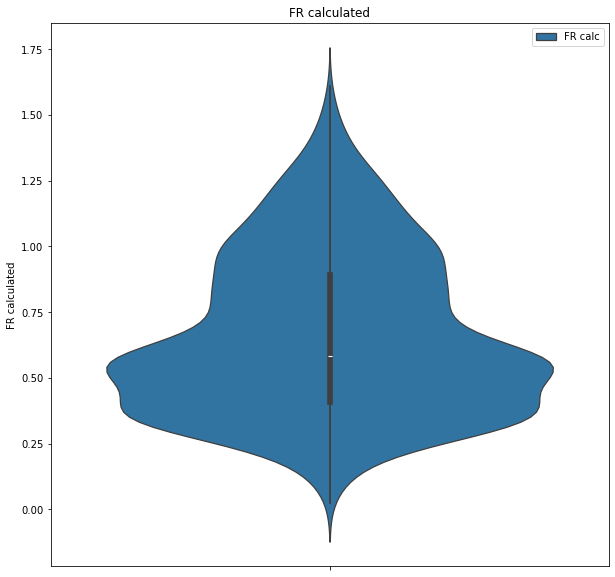

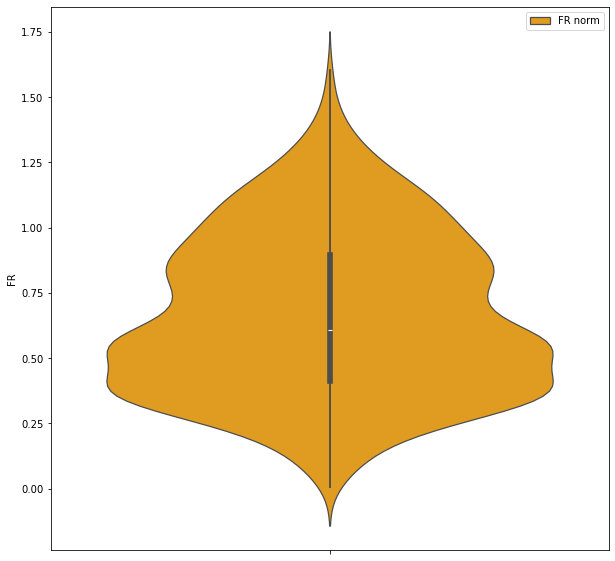

In [10]:
plt.figure(figsize=(10,10))
sns.violinplot(data=data_cut_20_last.iloc[:,255], density_norm="count", label='FR calc')
plt.title("FR calculated")
plt.legend()
plt.figure(figsize=(10,10))
sns.violinplot(data=data_cut_20_last.iloc[:,254], scale="count", label = "FR norm", color="orange")
plt.legend()

### Using queries for exploration of assigned values

In [94]:
sum_true_values = (data_cut_20_last["Compressive strength MPa"] > 50).sum()
sum_true_values

596

In [96]:
sum_true_values = ((data_cut_20_last["Compressive strength MPa"] > 50) & (data_cut_20_last["FR calculated"] > 0.7)).sum()
sum_true_values

134

In [97]:
sum_true_values = (data_cut_20_last["FR calculated"] > 0.7).sum()
sum_true_values

534

## Correlation between the spectral and physical variables

In [74]:
grouping = data_cut_20_last.iloc[:, -3:]
grouping

,paved_brick,facade,other
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1255,1,0,0
1256,0,1,0
1257,1,0,0
1258,1,0,0


In [75]:
spectral_and_lab =  data_cut_20_last.drop(grouping, axis=1)
spectral_and_lab =  spectral_and_lab.drop('FR', axis=1)
spectral_and_lab

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2396,2401,2407,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR calculated
0,1.744566,1.631853,1.524010,1.417335,1.314425,1.214227,1.118951,1.027436,0.941526,0.858801,...,-0.119331,-0.082081,-0.040808,1941.658716,10.128325,0.720700,2.175250,599.861009,15.745281,0.547439
1,1.463717,1.350071,1.240531,1.132891,1.028580,0.926922,0.829383,0.735591,0.646862,0.561571,...,0.338168,0.393329,0.453060,1945.953933,9.752222,0.714242,2.251885,399.781097,19.514794,0.550790
2,1.629454,1.517245,1.408810,1.302585,1.200637,1.101526,1.006765,0.915175,0.828452,0.744324,...,0.120262,0.168128,0.220863,1941.999514,9.322421,0.711291,2.240755,560.500889,20.702189,0.548271
3,1.785482,1.674163,1.567261,1.461352,1.359154,1.259299,1.164010,1.072343,0.986224,0.903004,...,-0.123401,-0.086854,-0.046349,1949.637277,9.786022,0.719664,2.339518,491.831734,23.256277,0.564598
4,1.576216,1.462705,1.352908,1.244983,1.140070,1.037931,0.939626,0.844842,0.754418,0.667345,...,0.254252,0.305939,0.362449,1938.356678,9.628847,0.719171,2.213399,465.664725,21.117134,0.551987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.978303,0.947799,0.920407,0.883148,0.846815,0.810284,0.777753,0.754822,0.742857,0.733847,...,-1.421896,-1.312720,-1.187152,2133.801889,7.502421,0.803206,0.562216,1260.298406,51.732340,0.282244
1256,1.060103,1.044847,1.029429,1.011778,0.997389,0.985248,0.973983,0.967522,0.965180,0.963174,...,-1.640124,-1.563946,-1.474503,2114.513910,7.497999,0.742626,0.966887,1575.366673,72.880811,0.345340
1257,0.112993,0.108959,0.106214,0.104379,0.105273,0.110279,0.118223,0.125203,0.138763,0.149604,...,-2.029563,-1.952675,-1.862464,2102.711585,7.119586,0.776193,0.559087,1475.521447,56.090208,0.276013
1258,1.272458,1.207592,1.143939,1.083807,1.030244,0.978931,0.927939,0.882268,0.839943,0.798272,...,-1.475106,-1.397284,-1.304893,2130.772255,7.582548,0.795226,0.538106,1520.919744,63.770995,0.273771


In [76]:
# Standardizing
sc = StandardScaler()
sc.fit(spectral_and_lab)
df_sc = pd.DataFrame(sc.fit_transform(spectral_and_lab),columns = spectral_and_lab.columns)
df_sc

C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2396,2401,2407,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR calculated
0,0.635368,0.574896,0.517002,0.457605,0.399998,0.343950,0.292669,0.244200,0.200502,0.159787,...,-0.267061,-0.300848,-0.335343,0.363328,-0.516353,-0.879296,-0.103377,-1.041226,-1.197180,-0.385333
1,-0.060021,-0.122033,-0.181947,-0.240052,-0.296211,-0.349881,-0.400229,-0.447288,-0.490600,-0.530019,...,0.494889,0.471079,0.445396,0.381053,-0.576592,-0.934111,-0.055067,-1.315444,-1.082953,-0.374575
2,0.350347,0.291438,0.232964,0.176156,0.122853,0.071781,0.024221,-0.021789,-0.064700,-0.105889,...,0.131973,0.105419,0.078324,0.364734,-0.645432,-0.959164,-0.062083,-1.095171,-1.046971,-0.382663
3,0.736679,0.679539,0.623645,0.565565,0.508940,0.452796,0.400488,0.350601,0.305337,0.262371,...,-0.273840,-0.308598,-0.344102,0.396253,-0.571179,-0.888084,0.000176,-1.189285,-0.969575,-0.330239
4,0.218530,0.156544,0.095131,0.034876,-0.024666,-0.081798,-0.136432,-0.188432,-0.238340,-0.284541,...,0.355130,0.329183,0.302154,0.349702,-0.596353,-0.892267,-0.079328,-1.225148,-1.034397,-0.370732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,-1.261920,-1.116968,-0.971251,-0.852596,-0.738924,-0.631559,-0.523772,-0.401723,-0.265456,-0.130205,...,-2.436444,-2.299046,-2.147559,1.156228,-0.936937,-0.178931,-1.120213,-0.136071,-0.106669,-1.236830
1256,-1.059381,-0.876941,-0.702445,-0.537106,-0.372181,-0.209026,-0.054220,0.102242,0.255981,0.402014,...,-2.799897,-2.706965,-2.601822,1.076634,-0.937646,-0.693173,-0.865114,0.295743,0.534190,-1.034238
1257,-3.404454,-3.191662,-2.978739,-2.762682,-2.545038,-2.322044,-2.101941,-1.893519,-1.682295,-1.486105,...,-3.448496,-3.338147,-3.215137,1.027930,-0.998255,-0.408236,-1.122186,0.158901,0.025387,-1.256837
1258,-0.533584,-0.474424,-0.420106,-0.360441,-0.292158,-0.224281,-0.164397,-0.099757,-0.037751,0.019312,...,-2.525064,-2.436354,-2.333692,1.143726,-0.924104,-0.246669,-1.135412,0.221121,0.258137,-1.264035


## PCA with Hoggorm

In [22]:
data_vals= df_sc.values
col_names = list(df_sc.columns)

#model = ho.nipalsPCA(arrX=data_vals, numComp=5, Xstand=False, cvType=["loo"])


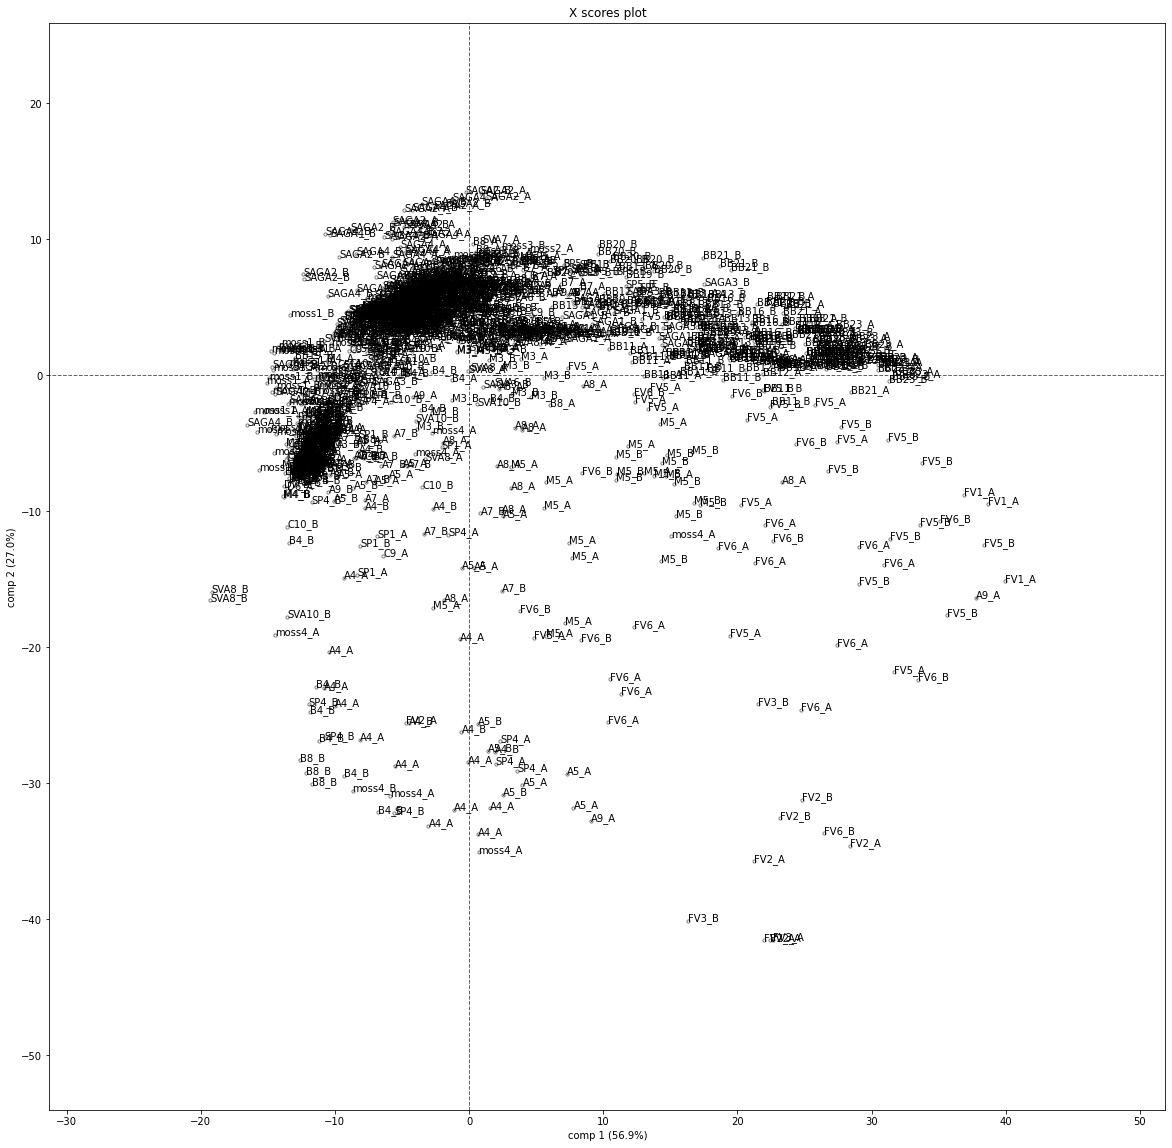

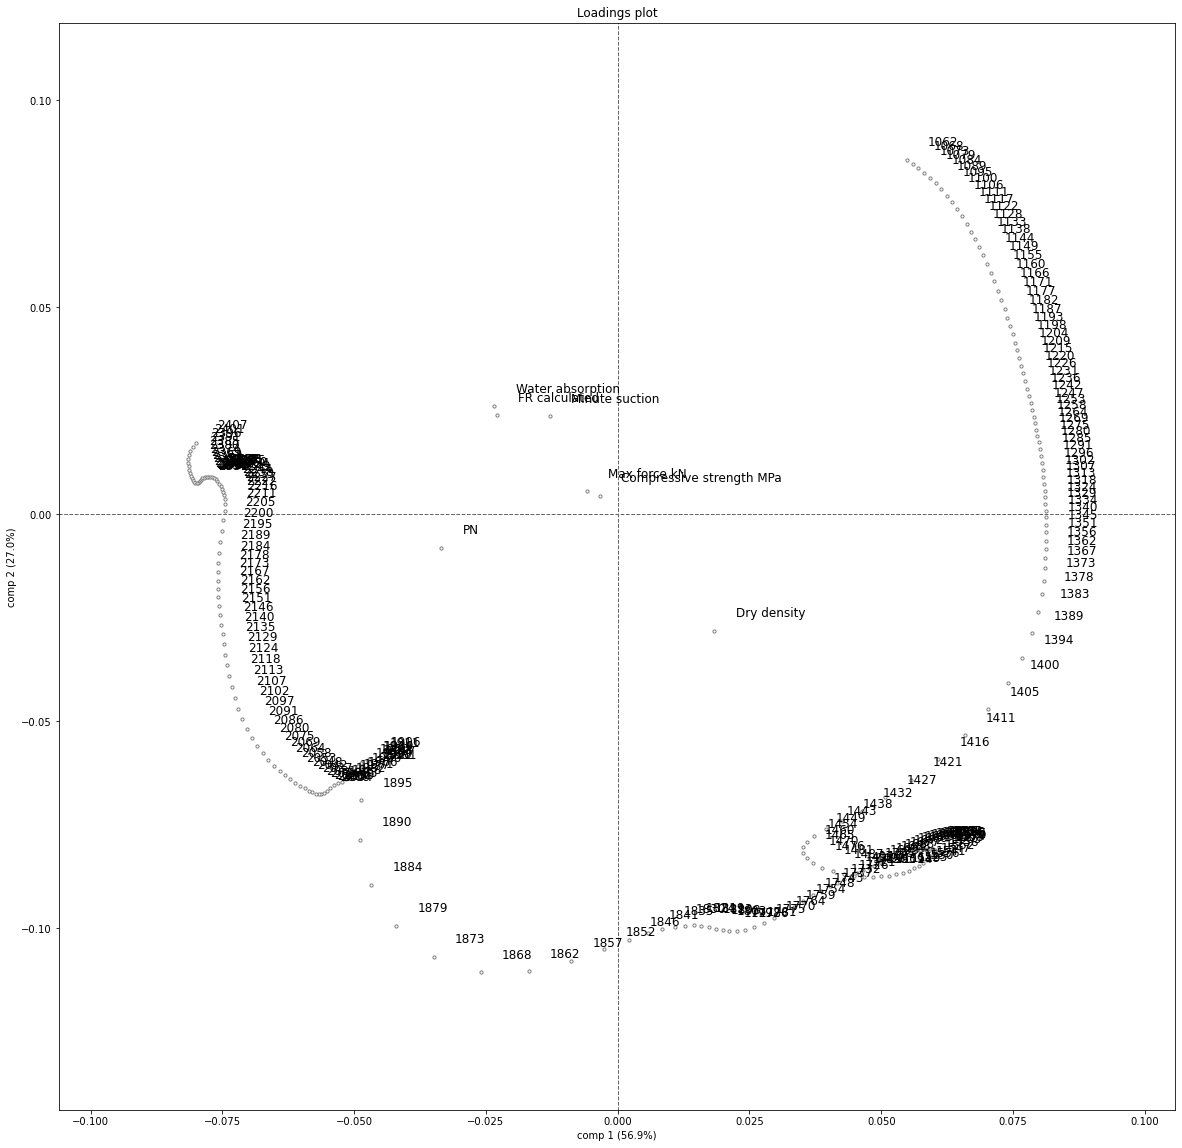

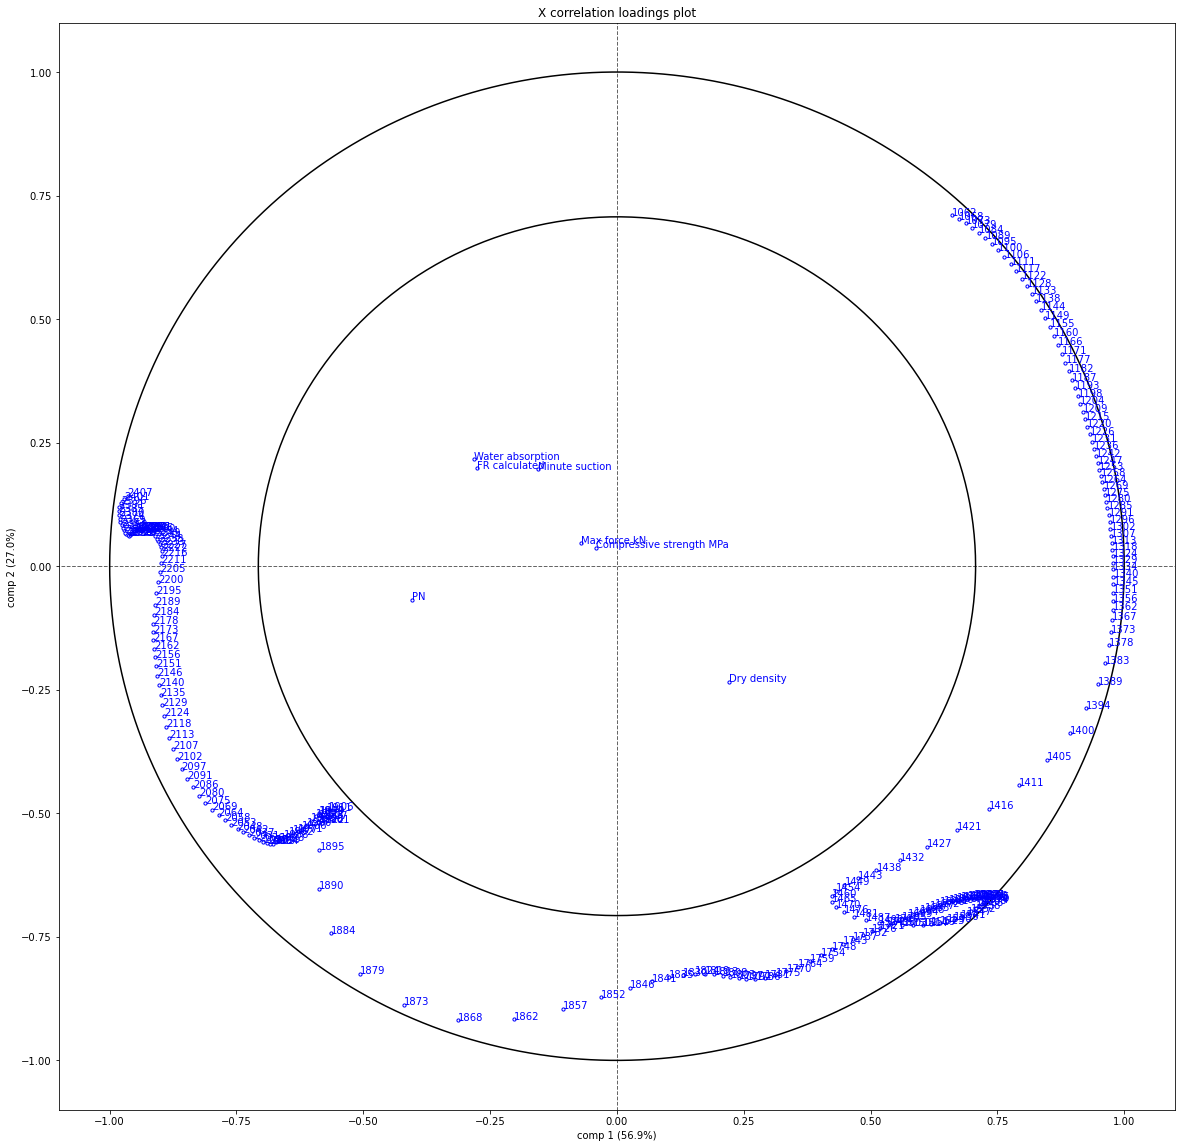

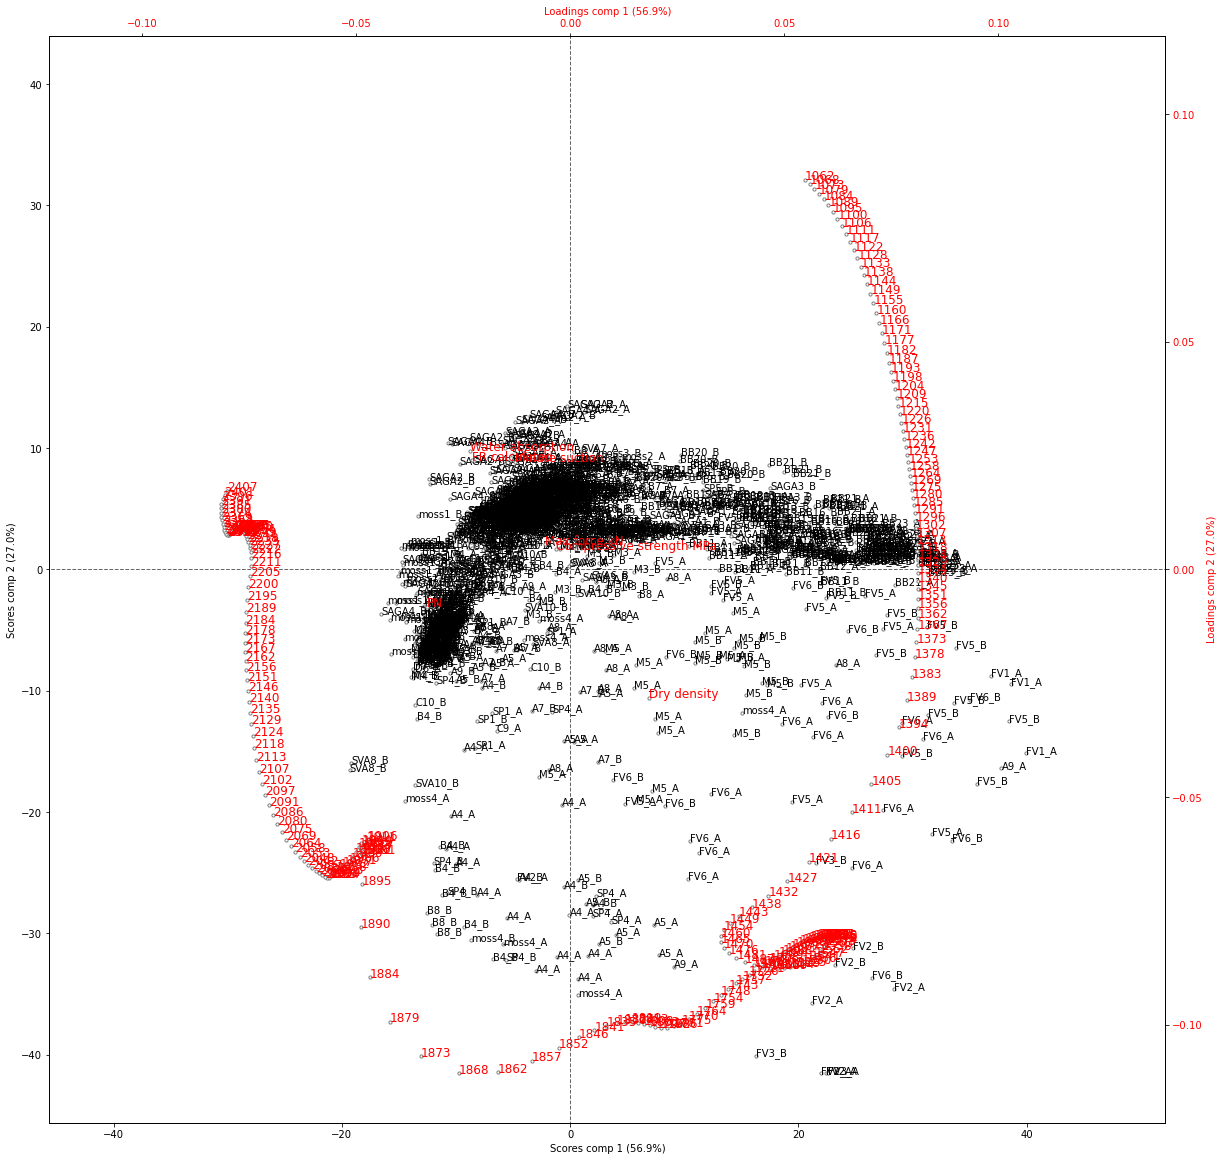

In [15]:
hopl.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4], 
         objNames=brick_ids, 
         XvarNames=col_names, figsize=(20,20))

In [16]:
loadings = model.X_loadings()
scores = model.X_scores()

In [17]:
# Get calibrated explained variance of each component
calExplVar = model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,56.909452
PC2,26.988322
PC3,9.236731
PC4,2.573460
PC5,1.678633


C:\Users\marth\AppData\Local\Temp/ipykernel_17936/3193617621.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10', 10)
C:\Users\marth\AppData\Local\Temp/ipykernel_17936/3193617621.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20c = plt.cm.get_cmap('tab20c', 20)


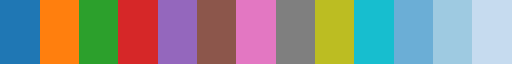

In [29]:
from matplotlib.colors import ListedColormap

# Get colors from tab10 and tab20c colormaps
tab10 = plt.cm.get_cmap('tab10', 10)
tab20c = plt.cm.get_cmap('tab20c', 20)

# Select specific colors from tab20c
#selected_tab10_colors = tab10(np.array([0,1,2,3,5,6,7,8,9]))
selected_tab20c_colors = tab20c(np.array([1, 2, 3]))  # Colors 2, 3, and 4

# Combine selected colors from tab20c with all colors from tab10
#combined_colors = np.vstack((selected_tab10_colors[0], selected_tab20c_colors, selected_tab10_colors[1:]))
combined_colors = np.vstack((tab10.colors, selected_tab20c_colors))
# Create a new colormap
custom_cmap = ListedColormap(combined_colors)
custom_cmap

In [19]:
def biplot_spectra(score, comp1, comp2, loads, labels=None):
    fig = plt.figure(figsize=(15,15))
    rect = 0.1, 0.1, 0.8, 0.8
    ax1 = fig.add_axes(rect)
    
    c1 = comp1 + 1
    c2 = comp2 + 1
  
    scatter = ax1.scatter(score[:, comp1], score[:, comp2], s=100, c=group_ids, cmap=custom_cmap, edgecolor='black', label=group_ids)
    ax1.set_xlabel(f'Score comp {c1}', color='b', fontsize=20)
    ax1.set_ylabel(f'Score comp {c2}', color='b', fontsize=20)
    legend1 = ax1.legend(*scatter.legend_elements(),
                        loc="lower right", title="Brick groups", fontsize=18, title_fontsize=20)
    ax1.add_artist(legend1)
    
    #for i in range(score.shape[0]):
    #    xpos = score[:, comp1][i]-0.5
    #    ypos = score[:, comp2][i]
    #    plt.text(xpos, ypos, brick_ids[i], color='black', ha='right', va='top', fontsize=11)
        
    ax2 = fig.add_axes(rect, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')

    ax2.scatter(loads[:, comp1], loads[:, comp2], marker='x', c='red') # Put your speed/rotation plot here
    ax2.set_xlabel(f'Loading comp {c1}', color='r', fontsize=20)
    ax2.set_ylabel(f'Loading comp {c2}', color='r', fontsize=20)
##
    n = loads.shape[0]
    for i in range(n):
        plt.text(loads[i, comp1], loads[i, comp2], labels[i], color='black', ha='left', va='center', fontsize=12)
    #plt.title(f'Spectral data and labdata - PC{c1} and PC{c2}', fontsize=25)
    ##plt.legend()
    ##ax1.legend()
    plt.show()

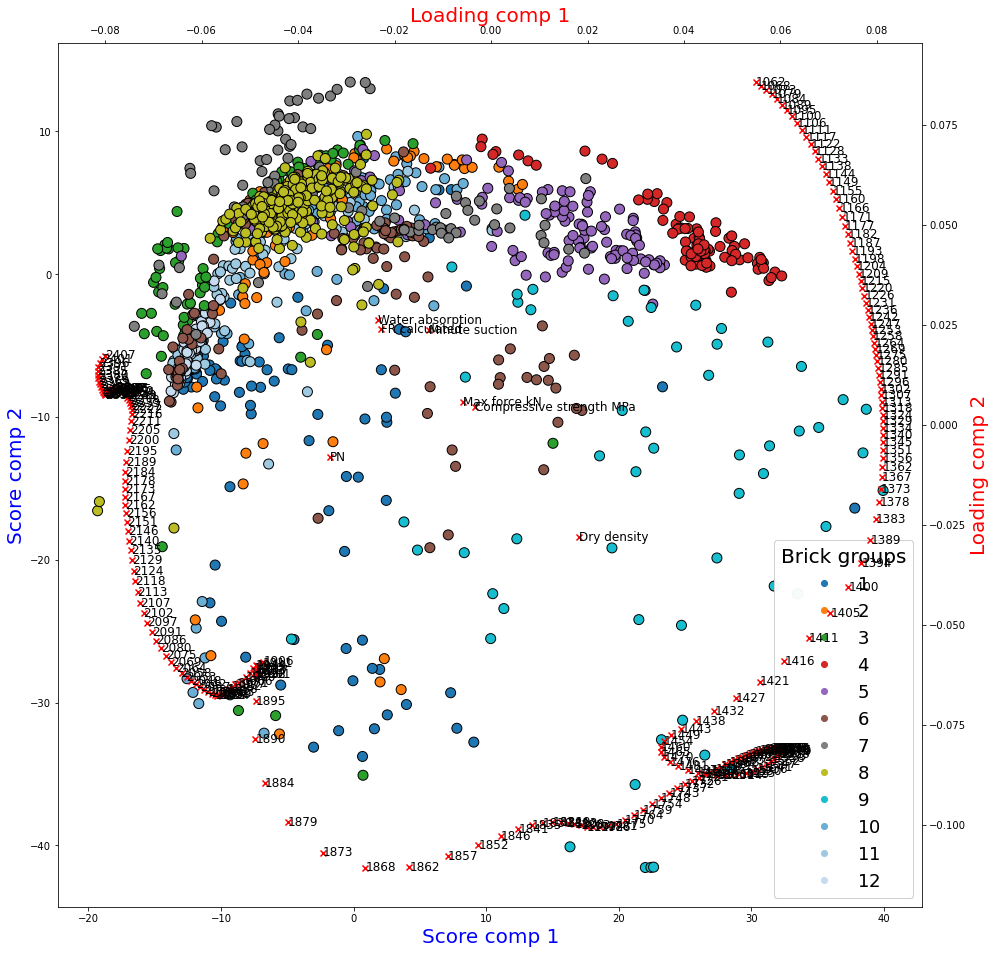

In [20]:
biplot_spectra(scores, 0, 1, loadings, labels=col_names)

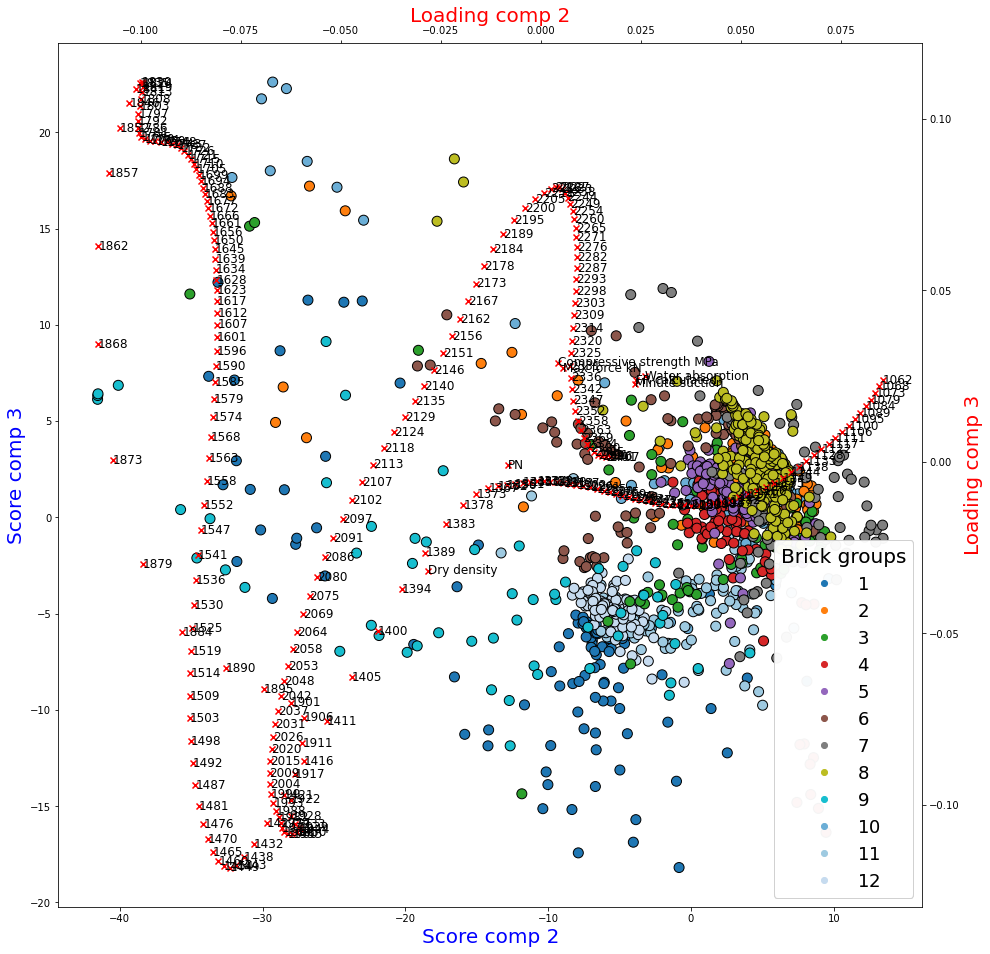

In [21]:
biplot_spectra(scores, 1, 2, loadings, labels=col_names)

## PLS with Hoggorm

In [12]:
df_sc.iloc[:, -7: ]

,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR calculated
0,0.363328,-0.516353,-0.879296,-0.103377,-1.041226,-1.197180,-0.385333
1,0.381053,-0.576592,-0.934111,-0.055067,-1.315444,-1.082953,-0.374575
2,0.364734,-0.645432,-0.959164,-0.062083,-1.095171,-1.046971,-0.382663
3,0.396253,-0.571179,-0.888084,0.000176,-1.189285,-0.969575,-0.330239
4,0.349702,-0.596353,-0.892267,-0.079328,-1.225148,-1.034397,-0.370732
...,...,...,...,...,...,...,...
1255,1.156228,-0.936937,-0.178931,-1.120213,-0.136071,-0.106669,-1.236830
1256,1.076634,-0.937646,-0.693173,-0.865114,0.295743,0.534190,-1.034238
1257,1.027930,-0.998255,-0.408236,-1.122186,0.158901,0.025387,-1.256837
1258,1.143726,-0.924104,-0.246669,-1.135412,0.221121,0.258137,-1.264035


In [13]:
# Get the values from the data frame
X = df_sc.iloc[:, :-7 ].values # the spectral values
Y = df_sc.iloc[:, -7: ].values # the physical values

# Get the variable or columns names
X_varNames = list(df_sc.iloc[:, :-7].columns)
Y_varNames = list(df_sc.iloc[:, -7:].columns)

# Get the object or row names
X_objNames = brick_ids
Y_objNames = brick_ids

In [14]:
model = ho.nipalsPLS2(arrX=X, Xstand=False, 
                      arrY=Y, Ystand=False,
                      cvType=["loo"], 
                      numComp=10)

loo


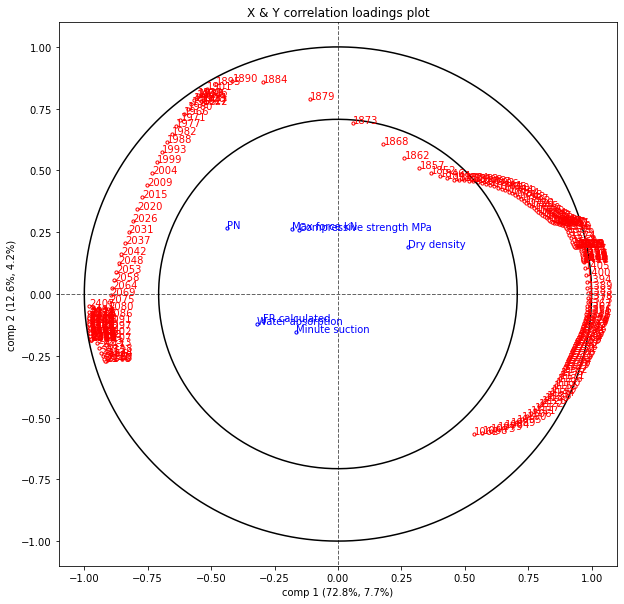

In [42]:
hopl.plot(model, comp=[1, 2], 
         plots=[3], 
         objNames=X_objNames, 
         XvarNames=X_varNames,
         YvarNames=Y_varNames, figsize=(10,10))

In [15]:
# drop minute suction and max force
dropped = df_sc.drop(labels=['Minute suction', 'Max force kN'], axis=1)
dropped

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2385,2391,2396,2401,2407,Dry density,Water absorption,PN,Compressive strength MPa,FR calculated
0,0.635368,0.574896,0.517002,0.457605,0.399998,0.343950,0.292669,0.244200,0.200502,0.159787,...,-0.202794,-0.233964,-0.267061,-0.300848,-0.335343,0.363328,-0.516353,-0.879296,-1.197180,-0.385333
1,-0.060021,-0.122033,-0.181947,-0.240052,-0.296211,-0.349881,-0.400229,-0.447288,-0.490600,-0.530019,...,0.540455,0.518748,0.494889,0.471079,0.445396,0.381053,-0.576592,-0.934111,-1.082953,-0.374575
2,0.350347,0.291438,0.232964,0.176156,0.122853,0.071781,0.024221,-0.021789,-0.064700,-0.105889,...,0.181534,0.157012,0.131973,0.105419,0.078324,0.364734,-0.645432,-0.959164,-1.046971,-0.382663
3,0.736679,0.679539,0.623645,0.565565,0.508940,0.452796,0.400488,0.350601,0.305337,0.262371,...,-0.207901,-0.239988,-0.273840,-0.308598,-0.344102,0.396253,-0.571179,-0.888084,-0.969575,-0.330239
4,0.218530,0.156544,0.095131,0.034876,-0.024666,-0.081798,-0.136432,-0.188432,-0.238340,-0.284541,...,0.406123,0.380928,0.355130,0.329183,0.302154,0.349702,-0.596353,-0.892267,-1.034397,-0.370732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,-1.261920,-1.116968,-0.971251,-0.852596,-0.738924,-0.631559,-0.523772,-0.401723,-0.265456,-0.130205,...,-2.681323,-2.569079,-2.436444,-2.299046,-2.147559,1.156228,-0.936937,-0.178931,-0.106669,-1.236830
1256,-1.059381,-0.876941,-0.702445,-0.537106,-0.372181,-0.209026,-0.054220,0.102242,0.255981,0.402014,...,-2.969143,-2.887711,-2.799897,-2.706965,-2.601822,1.076634,-0.937646,-0.693173,0.534190,-1.034238
1257,-3.404454,-3.191662,-2.978739,-2.762682,-2.545038,-2.322044,-2.101941,-1.893519,-1.682295,-1.486105,...,-3.620991,-3.543647,-3.448496,-3.338147,-3.215137,1.027930,-0.998255,-0.408236,0.025387,-1.256837
1258,-0.533584,-0.474424,-0.420106,-0.360441,-0.292158,-0.224281,-0.164397,-0.099757,-0.037751,0.019312,...,-2.684482,-2.608676,-2.525064,-2.436354,-2.333692,1.143726,-0.924104,-0.246669,0.258137,-1.264035


In [16]:
# Get the values from the data frame
X = dropped.iloc[:, :-5 ].values # the spectral values
Y = dropped.iloc[:, -5: ].values # the physical values

# Get the variable or columns names
X_varNames = list(dropped.iloc[:, :-5].columns)
Y_varNames = list(dropped.iloc[:, -5:].columns)

# Get the object or row names
X_objNames = brick_ids
Y_objNames = brick_ids

In [42]:
X

array([[-1.97708451, -1.9332633 , -1.8868443 , ..., -0.2519583 ,
        -0.29269997, -0.33235202],
       [-2.49390428, -2.44807302, -2.39948617, ..., -0.38682676,
        -0.45173904, -0.5169853 ],
       [-2.78756517, -2.73981456, -2.68995552, ..., -0.43585605,
        -0.52323218, -0.61002739],
       ...,
       [ 0.21593839,  0.26824412,  0.32662032, ..., -1.56531341,
        -1.44515742, -1.32191399],
       [-1.67018516, -1.64044536, -1.60859345, ..., -0.61367116,
        -0.50193004, -0.37756739],
       [-0.62265855, -0.56468419, -0.504906  , ..., -2.97687699,
        -2.84908564, -2.71027875]])

In [17]:
model_dropped = ho.nipalsPLS2(arrX=X, Xstand=False, 
                      arrY=Y, Ystand=False,
                      cvType=["loo"], 
                      numComp=10)

loo


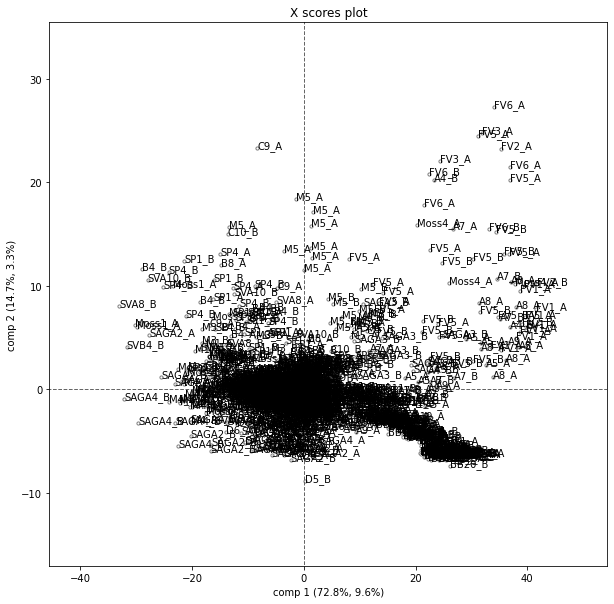

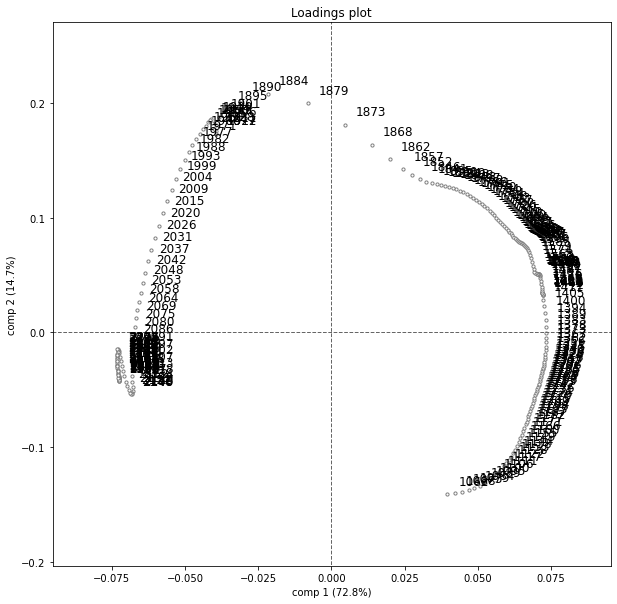

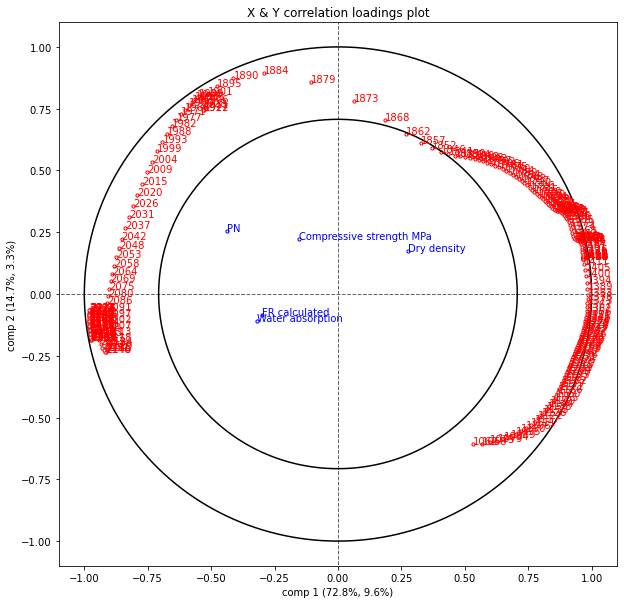

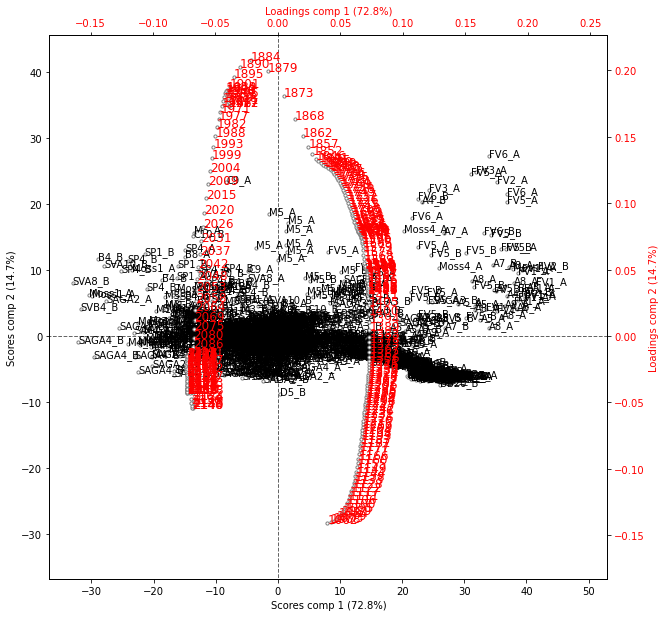

In [71]:
hopl.plot(model_dropped, comp=[1, 2], 
         plots=[1,2,3,4], 
         objNames=X_objNames, 
         XvarNames=X_varNames,
         YvarNames=Y_varNames, figsize=(10,10))

In [18]:
# Get X scores and store in numpy array
X_scores = model.X_scores()
# Get X loadings and store in numpy array
X_loadings = model.X_loadings()
# Get Y loadings and store in numpy array
Y_loadings = model.Y_loadings()
# Get X correlation loadings and store in numpy array
X_corrloadings = model.X_corrLoadings()

properties = list(df_sc.columns)[-7:]
properties

['Dry density',
 'Water absorption',
 'PN',
 'Minute suction',
 'Max force kN',
 'Compressive strength MPa',
 'FR calculated']

In [20]:
# Get X scores and store in numpy array
X_scores = model_dropped.X_scores()
# Get X loadings and store in numpy array
X_loadings = model_dropped.X_loadings()
# Get Y loadings and store in numpy array
Y_loadings = model_dropped.Y_loadings()
# Get X correlation loadings and store in numpy array
X_corrloadings = model_dropped.X_corrLoadings()

properties = list(dropped.columns)[-5:]
properties

['Dry density',
 'Water absorption',
 'PN',
 'Compressive strength MPa',
 'FR calculated']

In [30]:
def pls_correlation(comp1, comp2, loads, labels=col_names, properties=None):
    fig = plt.figure(figsize=(15,15))
    rect = 0.1, 0.1, 0.8, 0.8
    ax1 = fig.add_axes(rect)
    
    c1 = comp1 + 1
    c2 = comp2 + 1
  
    scatter = ax1.scatter(score[:, comp1], score[:, comp2], s=100, c='red', cmap=custom_cmap, edgecolor='black', label=group_ids)
    ax1.set_xlabel(f'Score comp {c1}', color='b', fontsize=20)
    ax1.set_ylabel(f'Score comp {c2}', color='b', fontsize=20)
    legend1 = ax1.legend(*scatter.legend_elements(),
                        loc="lower right", title="Brick groups", fontsize=18, title_fontsize=20)
    ax1.add_artist(legend1)
   #
   #for i in range(score.shape[0]):
   #    xpos = score[:, comp1][i]-0.5
   #    ypos = score[:, comp2][i]
   #    plt.text(xpos, ypos, brick_ids[i], color='black', ha='right', va='top', fontsize=11)
        
    ax2 = fig.add_axes(rect, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')

    ax2.scatter(loads[:, comp1], loads[:, comp2], marker='x', c='red') # Put your speed/rotation plot here
    ax2.set_xlabel(f'Loading comp {c1}', color='r', fontsize=20)
    ax2.set_ylabel(f'Loading comp {c2}', color='r', fontsize=20)
    ax2.scatter(Y_loadings[:, comp1], Y_loadings[:, comp2], marker='x', c="red", s=100)
    n = loads.shape[0]
    for i in range(n):
        plt.text(loads[i, comp1], loads[i, comp2], labels[i], color='black', ha='left', va='center', fontsize=12)
    j = Y_loadings.shape[0]
    for i in range(j):
        plt.text(Y_loadings[i, comp1], Y_loadings[i, comp2], properties[i], color='black', ha='left', va='center', fontsize=16)
    #plt.title(f'Spectral data and labdata - PC{c1} and PC{c2}', fontsize=25)
    ##plt.legend()
    ##ax1.legend()
    plt.show()

In [45]:
#pls_correlation(0, 1, X_loadings, properties=properties )

In [52]:
# BRUK DENNE
import matplotlib.patheffects as path_effects

def biplot_pls_spectra(score, comp1, comp2, loads, labels=None, properties=None):
    fig = plt.figure(figsize=(15,15))
    rect = 0.1, 0.1, 0.8, 0.8
    ax1 = fig.add_axes(rect)
    
    c1 = comp1 + 1
    c2 = comp2 + 1
  
    scatter = ax1.scatter(score[:, comp1], score[:, comp2], s=120, c=group_ids, cmap=custom_cmap, edgecolor='black', label=group_ids)
    ax1.set_xlabel(f'X-score comp {c1}', color='b', fontsize=20, fontweight="bold")
    ax1.set_ylabel(f'X-score comp {c2}', color='b', fontsize=20, fontweight="bold")
    legend1 = ax1.legend(*scatter.legend_elements(),
                        loc="upper left", title="Brick groups", fontsize=18, title_fontsize=20)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tick_params(axis='both', which='major', length=10, width=3)
    ax1.add_artist(legend1)
    
    #for i in range(score.shape[0]):
    #    xpos = score[:, comp1][i]-0.5
    #    ypos = score[:, comp2][i]
    #    plt.text(xpos, ypos, brick_ids[i], color='black', ha='right', va='top', fontsize=11)
        
    ax2 = fig.add_axes(rect, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')

    ax2.scatter(loads[:, comp1], loads[:, comp2], marker='x', c='red') 
    ax2.set_xlabel(f'Loading comp {c1}', color='r', fontsize=25, fontweight="bold")
    ax2.set_ylabel(f'Loading comp {c2}', color='r', fontsize=25, fontweight="bold")
    ax2.scatter(Y_loadings[:, comp1], Y_loadings[:, comp2], marker='x', c="red", s=120)
    n = loads.shape[0]
    for i in range(n):
        plt.text(loads[i, comp1], loads[i, comp2], labels[i], color='black', ha='left', va='center', fontsize=15)
    j = Y_loadings.shape[0]
    for i in range(j):
        plt.text(Y_loadings[i, comp1], Y_loadings[i, comp2], properties[i], color='black', ha='left', va='center', fontsize=20, fontweight="bold", path_effects=[path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tick_params(axis='both', which='major', length=10, width=3)
    #plt.title(f'Spectral data and labdata - PC{c1} and PC{c2}', fontsize=25)
    ##plt.legend()
    ##ax1.legend()
    plt.show()

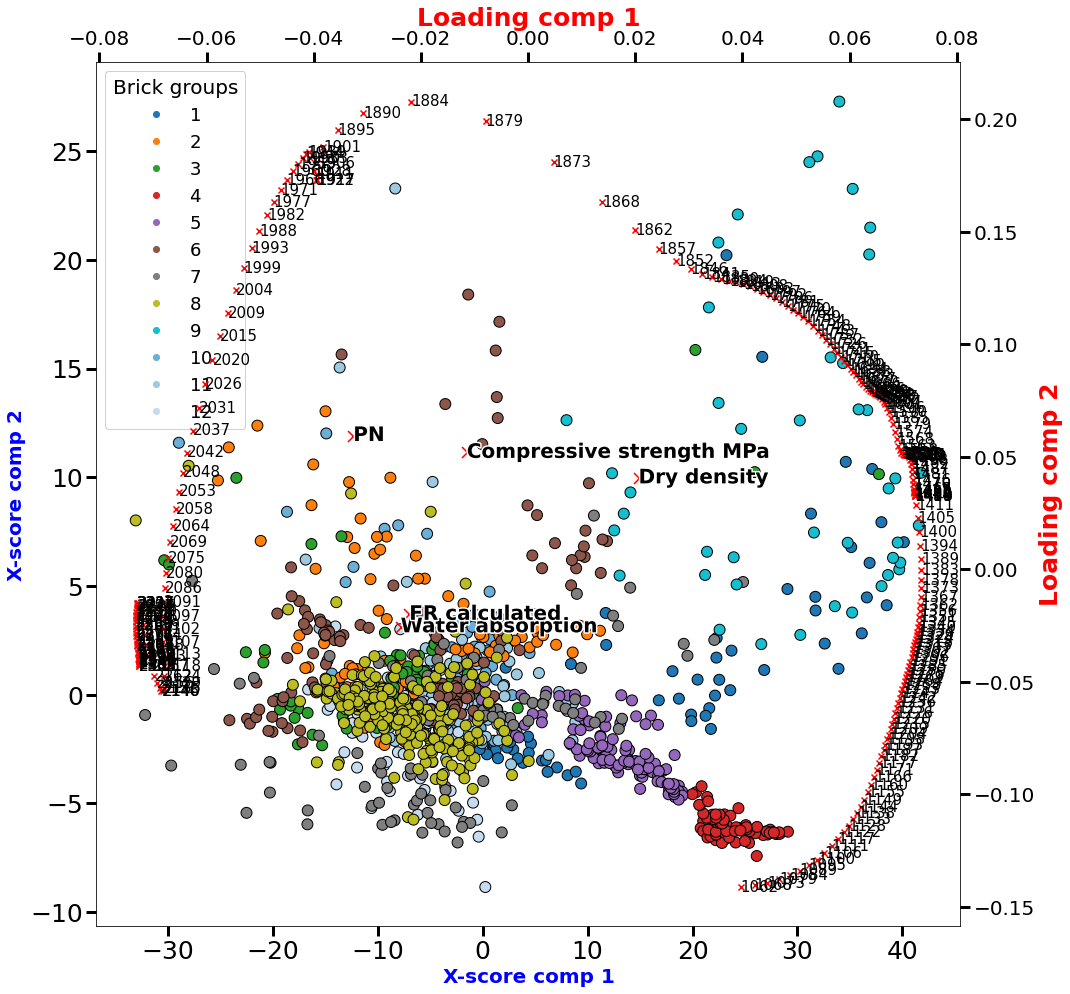

In [53]:
biplot_pls_spectra(X_scores, 0, 1, X_loadings, labels=col_names, properties=properties)

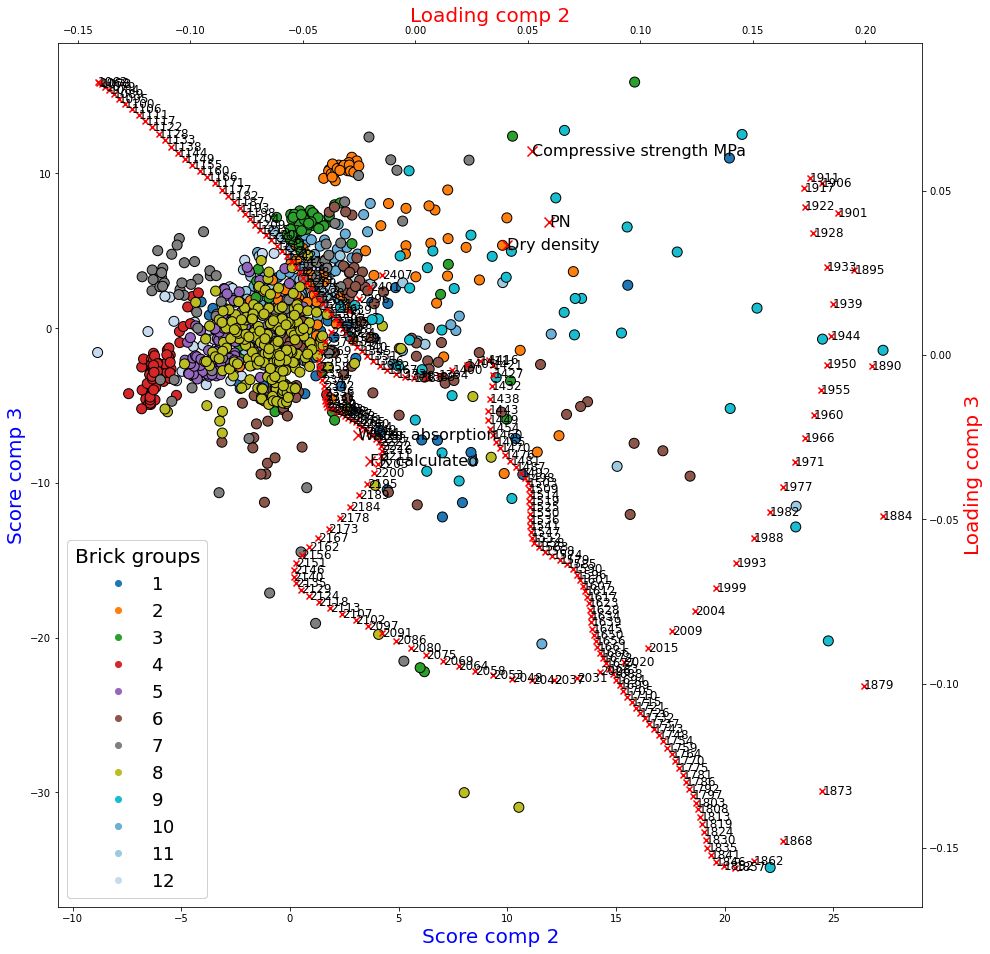

In [80]:
biplot_pls_spectra(X_scores, 1, 2, X_loadings, labels=col_names, properties=properties)

## Extracting only the spectra

In [77]:
spectral = data_cut_20_last.drop(labels=["Max force kN", "PN", "FR", "FR calculated", "Compressive strength MPa", "Water absorption", "Minute suction", "Dry density"], axis=1)

In [78]:
grouping = spectral.iloc[:, -3:]
grouping

,paved_brick,facade,other
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1255,1,0,0
1256,0,1,0
1257,1,0,0
1258,1,0,0


In [79]:
spectral_no_group = spectral.drop(grouping, axis=1)
spectral_no_group



,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2358,2363,2369,2374,2380,2385,2391,2396,2401,2407
0,1.744566,1.631853,1.524010,1.417335,1.314425,1.214227,1.118951,1.027436,0.941526,0.858801,...,-0.270526,-0.263761,-0.251745,-0.233891,-0.211298,-0.184049,-0.153588,-0.119331,-0.082081,-0.040808
1,1.463717,1.350071,1.240531,1.132891,1.028580,0.926922,0.829383,0.735591,0.646862,0.561571,...,0.129046,0.132945,0.145795,0.168932,0.201250,0.241630,0.287518,0.338168,0.393329,0.453060
2,1.629454,1.517245,1.408810,1.302585,1.200637,1.101526,1.006765,0.915175,0.828452,0.744324,...,-0.060102,-0.056553,-0.045889,-0.025713,0.001863,0.036066,0.075533,0.120262,0.168128,0.220863
3,1.785482,1.674163,1.567261,1.461352,1.359154,1.259299,1.164010,1.072343,0.986224,0.903004,...,-0.267071,-0.262382,-0.252293,-0.235639,-0.213636,-0.186974,-0.157118,-0.123401,-0.086854,-0.046349
4,1.576216,1.462705,1.352908,1.244983,1.140070,1.037931,0.939626,0.844842,0.754418,0.667345,...,0.069744,0.070568,0.079647,0.099248,0.127754,0.164694,0.206753,0.254252,0.305939,0.362449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.978303,0.947799,0.920407,0.883148,0.846815,0.810284,0.777753,0.754822,0.742857,0.733847,...,-1.710655,-1.733140,-1.734413,-1.714414,-1.670096,-1.603571,-1.522017,-1.421896,-1.312720,-1.187152
1256,1.060103,1.044847,1.029429,1.011778,0.997389,0.985248,0.973983,0.967522,0.965180,0.963174,...,-1.802658,-1.831620,-1.845212,-1.837637,-1.812484,-1.768414,-1.708743,-1.640124,-1.563946,-1.474503
1257,0.112993,0.108959,0.106214,0.104379,0.105273,0.110279,0.118223,0.125203,0.138763,0.149604,...,-2.049877,-2.116881,-2.161614,-2.181722,-2.174929,-2.141745,-2.093136,-2.029563,-1.952675,-1.862464
1258,1.272458,1.207592,1.143939,1.083807,1.030244,0.978931,0.927939,0.882268,0.839943,0.798272,...,-1.686720,-1.700149,-1.700751,-1.682707,-1.651552,-1.605380,-1.545222,-1.475106,-1.397284,-1.304893


In [168]:
# Standardizing
#sc = StandardScaler()
#sc.fit(cs_no_group)
#df_sc = pd.DataFrame(sc.fit_transform(cs_no_group),columns = cs_no_group.columns)
#df_sc

In [169]:
#df_sc_w_groups = df_sc.join(grouping)
#df_sc_w_groups

# PLS prediction



In [80]:
from sklearn.model_selection import train_test_split

X = spectral.iloc[:, :-3]
y = spectral.iloc[:, -3:]

# Split X into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [81]:
y_train

,paved_brick,facade,other
339,0,0,1
371,0,0,1
95,0,0,1
1248,1,0,0
977,0,0,1
...,...,...,...
1122,0,0,1
382,0,0,1
795,0,0,1
1089,0,0,1


In [259]:
#y_test = y_test.reset_index(drop=True)


In [284]:
len(y_train.query('paved_brick==1'))

62

In [261]:
rows_with_null = y_train[y_train.isnull().any(axis=1)]
rows_with_null

,paved_brick,facade,other


In [82]:
ww = X_train.columns
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)

PLSRegression(n_components=5)

In [83]:
Y_pred = pls.predict(X_test)
Y_pred

array([[-0.01506556,  0.17965542,  0.83541014],
       [ 0.04023175,  0.23318296,  0.72658529],
       [ 0.10810893,  0.38955017,  0.5023409 ],
       ...,
       [ 0.01714517,  0.13716399,  0.84569084],
       [ 0.06649121,  0.18041242,  0.75309637],
       [ 0.08036483,  0.40166114,  0.51797403]])

In [84]:
truth = []
for row in y_test.index:
    if y_test['paved_brick'][row] == 1:
        truth.append(1)
    elif y_test['facade'][row] == 1:
        truth.append(2)
    else:
        truth.append(3)


In [181]:
np.argmax(Y_pred[0])

1

In [85]:
def PredictionBrick(Y_pred):
    pred_paved = []
    pred_facade = []
    pred_other = []
    prediction = []
    for i in range(len(Y_pred)):
        if np.argmax(Y_pred[i]) == 0:
            pred_paved.append(1)
            pred_facade.append(0)
            pred_other.append(0)
            prediction.append(1)
        elif np.argmax(Y_pred[i]) == 1:
            pred_paved.append(0)
            pred_facade.append(1)
            pred_other.append(0)   
            prediction.append(2)
        else:
            pred_paved.append(0)
            pred_facade.append(0)
            pred_other.append(1)   
            prediction.append(3)
    pred_dict = {'paved_brick': pred_paved, 'facade': pred_facade, 'other': pred_other}
    pred_df = pd.DataFrame(data=pred_dict)
    return pred_df, prediction

In [86]:
pred_df, pred_list = PredictionBrick(Y_pred)
pred_df

,paved_brick,facade,other
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
373,0,0,1
374,0,1,0
375,0,0,1
376,0,0,1


In [87]:
y_test = y_test.reset_index(drop=True)

In [88]:
# Calculate accuracy
total_rows = len(y_test)
#correct_predictions = (y_test == pred_list).all(axis=1).sum()
correct_predictions = (y_test == pred_df).all(axis=1).sum()
accuracy = correct_predictions / total_rows

accuracy

0.7698412698412699

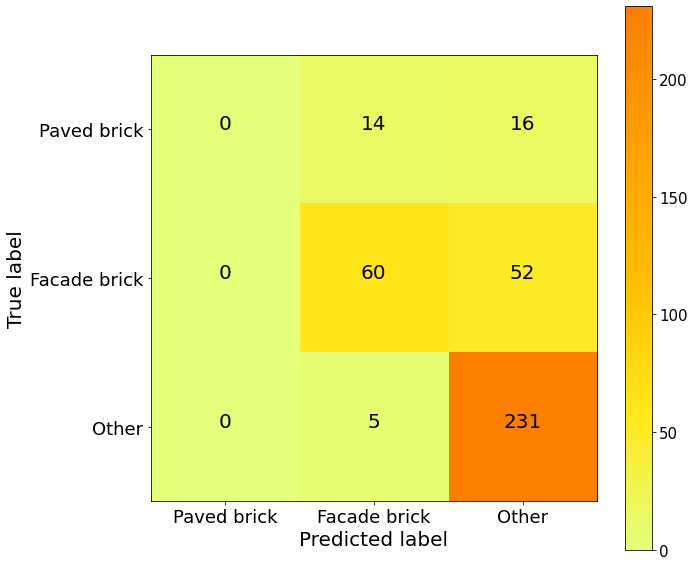

In [89]:
#confusion matrix

# Create confusion matrix
conf_matrix = confusion_matrix(truth, pred_list)

# Plot confusion matrix
plt.figure(figsize=(10,10))

plt.imshow(conf_matrix, interpolation='nearest', cmap='Wistia')
#plt.title('Confusion Matrix')
plt.colorbar().ax.tick_params(labelsize=15)
tick_marks = np.arange(len(set(truth)))
plt.xticks(tick_marks, ['Paved brick', 'Facade brick', 'Other'], fontsize=18)
plt.yticks(tick_marks, ['Paved brick', 'Facade brick', 'Other'], fontsize=18)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i][j]), horizontalalignment="center", color="black", fontsize=20)
# Add white grid lines between boxes
#plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()